# Data Wrangling and EDA

Here we work with the two data sets we mentioned. Let us go through the basic elements of the data wrangling process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
from PIL import Image
from datetime import date, timedelta
from scipy.stats import binom

import json
from pandas.io.json import json_normalize

plt.rcParams.update({'errorbar.capsize': 2})

## Rain Data

The rain data can be found in the url:

'https://www.kaggle.com/city-of-seattle/seattle-observed-monthly-rain-gauge-accumulations/downloads/seattle-observed-monthly-rain-gauge-accumulations.zip/16'

In order to use this data set, it seems necessary to use kaggle access privileges (user and password). Since the file is not too big, it has been downloaded locally. For a more pythonic approach see [link](https://ramhiser.com/2012/11/23/how-to-download-kaggle-data-with-python-and-requests-dot-py/). Other file included is the following image pointing to the position of the rain gauges placed around the city:

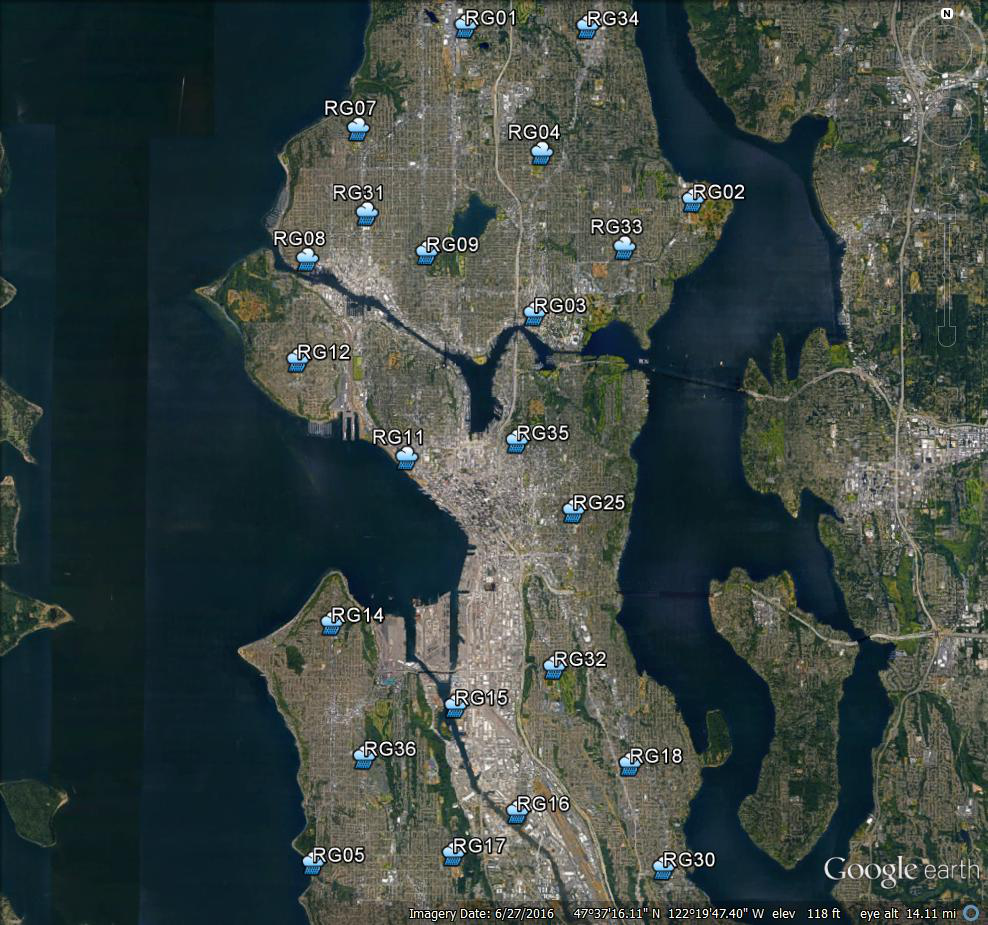

In [2]:
im = Image.open('rdata\SPU_DWW_RGs.jpg')

im

In reality the data set only includes meassurements for a subset of these gauges. With some online help, we can deduce an approximate location for them (latitude and longitude) which we store in the following dictionaries:

In [3]:
# g_ls0 includes the locations of all the gauges

g_ls0 = {'RG01': [47.723171, -122.344869],
'RG34': [47.721047, -122.297255],
'RG07': [47.698155, -122.377202],
'RG04': [47.693098, -122.312376],
'RG31': [47.679249, -122.376515],
'RG02': [47.684314, -122.263389],
'RG08': [47.669102, -122.398144],
'RG09': [47.669687, -122.354430],
'RG33': [47.671243, -122.291088],
'RG03': [47.655143, -122.316757],
'RG12': [47.644352, -122.401996],
'RG11': [47.623110, -122.361345],
'RG35': [47.624400, -122.324136],
'RG25': [47.601904, -122.303216],
'RG14': [47.582478, -122.389871],
'RG15': [47.564480, -122.343413],
'RG32': [47.571812, -122.309345],
'RG36': [47.553404, -122.377642],
'RG18': [47.550242, -122.283580],
'RG05': [47.523647, -122.393155],
'RG17': [47.525156, -122.342448],
'RG16': [47.536280, -122.321310],
'RG30': [47.524410, -122.271842]}

# g_ls includes the position of the used gauges

g_ls = {'RG01': [47.723171, -122.344869],
'RG07': [47.698155, -122.377202],
'RG04': [47.693098, -122.312376],
'RG02': [47.684314, -122.263389],
'RG08': [47.669102, -122.398144],
'RG09': [47.669687, -122.354430],
'RG03': [47.655143, -122.316757],
'RG12': [47.644352, -122.401996],
'RG11': [47.623110, -122.361345],
'RG20_25': [47.601904, -122.303216],
'RG14': [47.582478, -122.389871],
'RG15': [47.564480, -122.343413],
'RG18': [47.550242, -122.283580],
'RG05': [47.523647, -122.393155],
'RG17': [47.525156, -122.342448],
'RG16': [47.536280, -122.321310],
'RG10_30': [47.524410, -122.271842]}

Now we may proceed with the data sets themselves. We import the csv file and read it as a dataframe:

In [4]:
# read csv
df = pd.read_csv('rdata/observed-monthly-rain-gauge-accumulations-oct-2002-to-may-2017.csv', parse_dates = ['Date'])

df.head()

,Date,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
0,2002-11-30,2.43,3.36,2.88,2.48,0.78,2.49,2.57,2.93,3.25,2.38,2.59,2.46,3.06,2.69,3.59,3.17,3.15
1,2002-12-31,4.31,1.40,5.46,4.80,1.99,5.06,2.48,2.35,6.48,4.95,5.71,3.57,5.77,3.28,5.77,6.02,5.60
2,2003-01-31,6.55,7.35,5.84,6.48,7.57,4.47,7.39,7.31,5.42,6.58,7.58,5.72,7.47,8.32,9.69,7.66,7.17
3,2003-02-28,1.61,1.81,1.70,1.49,1.11,1.50,1.56,1.73,1.18,1.37,1.47,1.33,1.19,1.21,1.52,1.09,1.34
4,2003-03-31,5.01,5.88,3.12,5.01,5.09,5.15,5.14,5.01,5.68,4.01,5.16,4.57,5.50,5.61,5.62,5.49,4.89


In [5]:
#df.info()

df.Date.iloc[0]

Timestamp('2002-11-30 00:00:00')

Unfortunately, we don't have information on the units used for rain accumulation.

This data set has no null values:

In [6]:
df.isnull().values.any()

False

The date information for the measurements is a bit excesive for our current purposes. Since there is one measurement per month, we limit the date accuracy to month:

In [7]:
df.Date = df.Date.dt.to_period('m')

This rain data set covers the years 2003 to 2016 in their entirety, and couple of months at the end of 2002 and at the beginning of 2017:

In [8]:
df[:2]

,Date,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
0,2002-11,2.43,3.36,2.88,2.48,0.78,2.49,2.57,2.93,3.25,2.38,2.59,2.46,3.06,2.69,3.59,3.17,3.15
1,2002-12,4.31,1.40,5.46,4.80,1.99,5.06,2.48,2.35,6.48,4.95,5.71,3.57,5.77,3.28,5.77,6.02,5.60


In [9]:
df[-5:]

,Date,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
170,2017-01,4.24,4.08,4.03,3.95,4.03,4.51,4.00,4.19,3.95,4.01,4.20,4.28,4.06,3.95,3.98,4.02,4.02
171,2017-02,8.36,8.52,8.18,8.11,8.49,8.08,7.90,8.45,9.63,8.91,8.64,9.10,8.71,8.84,8.20,8.76,9.43
172,2017-03,7.19,6.77,6.59,6.71,6.31,7.00,6.54,7.20,7.33,6.53,7.15,7.02,6.64,6.92,5.70,7.38,6.68
173,2017-04,4.84,4.07,3.98,4.32,3.03,4.66,3.75,4.58,4.10,4.44,4.34,3.92,3.52,3.94,3.22,4.31,4.23
174,2017-05,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.14,0.01,0.00,0.02,0.03,0.02,0.01,0.06,0.00


In order to look for outliers, we can make a scatter plot with all the rain data:

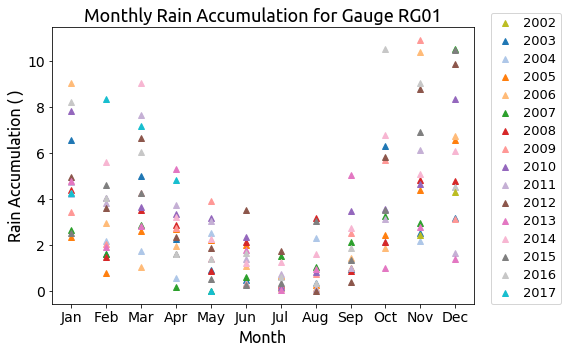

In [10]:
ms = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

gau = 'RG01'


fig, ax = plt.subplots(figsize=(8,5))
#plt.style.use('ggplot')

colormap = plt.cm.tab20
colorst = [colormap(i) for i in np.linspace(0, 0.9, 16)]       

for i in range(14):
    ax.plot( ms, df[2 + i*12 :14 + 12*i][gau], '^', label = str(2003+i), c = colorst[i])
ax.plot( ms[-2:], df[:2][gau], '^', label = '2002', c = colorst[14])
ax.plot( ms[:5], df[-5:][gau], '^', label = '2017', c = colorst[15])

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=(1.04,0))
plt.setp(ax.get_legend().get_texts(), fontsize='13')

ax.set_xlabel('Month', fontsize=16, fontname='Ubuntu')
ax.set_ylabel('Rain Accumulation ( )', fontsize=16, fontname='Ubuntu')
ax.set_title('Monthly Rain Accumulation for Gauge '+ gau, fontsize=18, fontname='Ubuntu')
ax.tick_params(labelsize=14)
fig.tight_layout()
#fig.savefig("RG01_Full.pdf", bbox_inches='tight')

Rain data seems fairly uniform, reasonable between the expectations of seasonal behavior.

As we will see in the fire 911 calls data, we only have full access to the time period between 2010-07 and 2011-02, so we select these data in a separate data frame:

In [11]:
bl = ((df['Date'].dt.year == 2010) & (df['Date'].dt.month >= 7)) | ((df['Date'].dt.year == 2011) & (df['Date'].dt.month <= 2))
df_rain_10_11_F = df[bl].reset_index(drop = True)

df_rain_10_11_F

,Date,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
0,2010-07,0.17,0.12,0.18,0.14,0.18,0.12,0.18,0.22,0.34,0.22,0.21,0.43,0.25,0.21,0.34,0.46,0.34
1,2010-08,0.82,0.73,0.82,0.73,0.64,0.76,0.77,0.96,0.59,0.67,0.69,0.59,0.55,0.60,0.64,0.65,0.72
2,2010-09,3.49,3.66,3.71,4.02,4.18,3.44,3.43,4.12,3.94,3.98,4.22,4.39,3.78,4.10,4.10,4.04,3.89
3,2010-10,3.57,3.70,3.92,3.76,4.71,3.52,3.88,4.29,5.71,3.95,4.22,4.72,4.74,4.94,4.73,4.86,4.35
4,2010-11,4.64,4.45,4.46,4.97,4.63,4.69,4.65,5.00,5.17,4.46,4.79,5.15,4.55,5.21,4.88,5.06,4.45
5,2010-12,8.36,7.55,8.39,8.02,8.78,8.93,8.75,9.46,9.71,8.36,8.87,9.71,8.89,10.25,9.18,9.27,8.16
6,2011-01,4.72,5.08,5.00,4.90,4.50,4.30,4.84,5.46,6.13,4.77,4.81,5.38,4.73,5.38,4.65,5.82,4.97
7,2011-02,3.83,3.11,3.44,3.33,2.95,3.88,3.59,3.89,3.59,3.18,3.40,3.41,2.94,3.45,2.99,3.58,3.32


## Fire 911 Calls

Now let us consider the 911 fire calls data set. We can import them directly from the Seattle data website:

In [12]:
url = 'https://data.seattle.gov/api/views/d9j6-s59d/rows.csv?accessType=DOWNLOAD'
df_fire_10_11 = pd.read_csv(url, parse_dates = ['Datetime'])

df_fire_10_11.head()

,Type,Datetime,Latitude,Longitude
0,Aid Response,2010-12-09 15:36:00,47.503741,-122.259489
1,Medic Response,2010-12-09 03:35:00,47.602172,-122.330863
2,Aid Response,2010-12-09 03:25:00,47.661290,-122.316335
3,Aid Response,2010-12-09 03:23:00,47.625482,-122.321324
4,Aid Response,2010-12-08 23:55:00,47.612136,-122.335373


It has no null values:

In [13]:
df_fire_10_11.isnull().values.any()

False

In order to see if the fire 911 data is correlated to the rain patterns, we have to associate their location with the location of the rain gauges. In order to do this, we write two functions:

`great_circle_dist(lat1,lon1,lat2,lon2)`

computes the distance in kilometers between two points, given their latitude and longitude, and

`closest_g(lat,lon)`

picks a point and finds the closest rain gauge. By using the latter, we can find the nearest gauge to each 911 caller. Effectively, this defines rain **gauge regions** as partitions or sectors that cover the city of Seattle.

In [14]:
def great_circle_dist(lat1,lon1,lat2,lon2):
    """Computes the great circle distance (in km) between
    two points on the earth surface, given the latitude
    and longitude of both points, in degrees."""
    # Mean Earth radius in km
    r = 6371.0088
    
    # Converts to rads
    lat1 = lat1*np.pi/180
    lon1 = lon1*np.pi/180
    lat2 = lat2*np.pi/180
    lon2 = lon2*np.pi/180
    
    sqrt_2 = np.sin((lat2-lat1)/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin((lon2-lon1)/2)**2
    d = 2*r*np.arcsin(np.sqrt(sqrt_2))
    
    return d

def closest_g(lat,lon):
    """Finds the closest rain gauge given the the latitude
    and longitude of a point in degrees."""
    t_dict = {}
    for k, v in g_ls.items():
        t_dict[k] = great_circle_dist(lat,lon,v[0],v[1])
    return sorted(t_dict, key = t_dict.get)[0]

We add a new column to the dataframe that gives the closest gauge to each 911 caller:

In [15]:
df_fire_10_11['C_gauge'] = df_fire_10_11.apply(lambda row: closest_g(row.Latitude,row.Longitude), axis=1)

In [16]:
df_fire_10_11.head()

,Type,Datetime,Latitude,Longitude,C_gauge
0,Aid Response,2010-12-09 15:36:00,47.503741,-122.259489,RG10_30
1,Medic Response,2010-12-09 03:35:00,47.602172,-122.330863,RG20_25
2,Aid Response,2010-12-09 03:25:00,47.661290,-122.316335,RG03
3,Aid Response,2010-12-09 03:23:00,47.625482,-122.321324,RG20_25
4,Aid Response,2010-12-08 23:55:00,47.612136,-122.335373,RG11


In addition, by taking a look of the Type column, we see that not all calls are explicitly related to fires. We select here the calls that have Fire in the Type description. We build a new dataframe where we keep only the Datetime and the closest gauge of these Fire calls:

In [17]:
df_fire_10_11_S = df_fire_10_11[['Datetime','C_gauge']][df_fire_10_11['Type'].str.contains('Fire')]

In [18]:
df_fire_10_11_S.head()

,Datetime,C_gauge
8,2010-12-07 06:37:00,RG11
16,2010-12-05 17:46:00,RG12
33,2010-11-26 02:02:00,RG11
35,2010-11-25 21:51:00,RG20_25
67,2011-03-01 22:26:00,RG11


We may consider in this data set only month presicion for the Datetime column, as we did with the rain data:

In [19]:
df_fire_10_11_S.Datetime = df_fire_10_11_S.Datetime.dt.to_period('m')

In [20]:
df_fire_10_11_S.head()

,Datetime,C_gauge
8,2010-12,RG11
16,2010-12,RG12
33,2010-11,RG11
35,2010-11,RG20_25
67,2011-03,RG11


We can get a first visualization of the fire data, by displaying the totality of 911 fire calls for each gauge region:

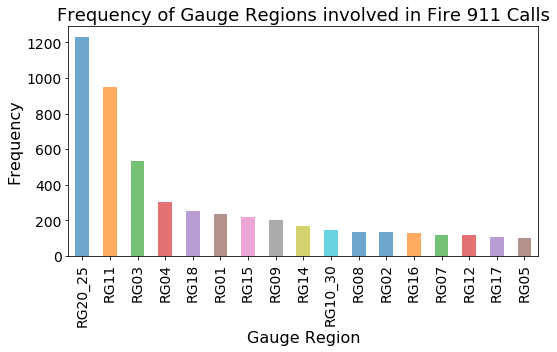

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
df_fire_10_11_S['C_gauge'].value_counts().plot(kind='bar', alpha = 0.65)
ax.set_xlabel('Gauge Region', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_title('Frequency of Gauge Regions involved in Fire 911 Calls', fontsize=18)
ax.tick_params(labelsize=14)
fig.tight_layout()
#fig.savefig("CallsvGauge.pdf", bbox_inches='tight')

As we see, there are some gauge regions that seem to posses an abnormal number of fire 911 calls. In order to be sure that the functions we build to assign a closer gauge are working, we can see the data explicitly in terms of their latitude and longitude, together with the location of rain gauges. The number of 911 fire calls appears as a 2D histogram plot:

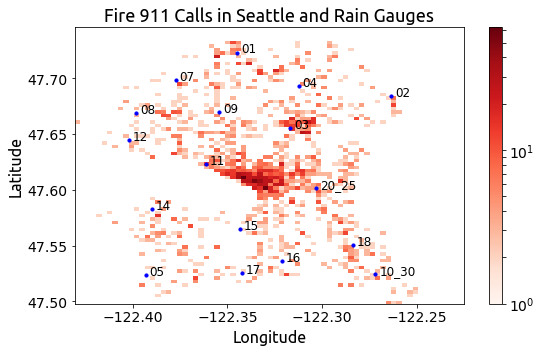

In [22]:
my_cmap = plt.cm.Reds
my_cmap.set_under('w',1)
xmin, xmax, ymin, ymax = df_fire_10_11['Longitude'][df_fire_10_11['Type'].str.contains('Fire')].min(), df_fire_10_11['Longitude'][df_fire_10_11['Type'].str.contains('Fire')].max(), df_fire_10_11['Latitude'][df_fire_10_11['Type'].str.contains('Fire')].min(), df_fire_10_11['Latitude'][df_fire_10_11['Type'].str.contains('Fire')].max()

fig, ax = plt.subplots(figsize=(8,5))

for k, v in g_ls.items():
    ax.scatter( v[1], v[0], s=10, c ='b', zorder = 1)
    ax.annotate(k[2:], (v[1], v[0]), xytext = (v[1]+0.002, v[0]), zorder = 1, size=12)


cax = ax.hist2d(df_fire_10_11['Longitude'][df_fire_10_11['Type'].str.contains('Fire')], df_fire_10_11['Latitude'][df_fire_10_11['Type'].str.contains('Fire')], bins = (80,80), cmap = my_cmap, vmin = 1, norm = matplotlib.colors.LogNorm(), zorder = -1)
cbar = fig.colorbar(cax[3])
cbar.ax.tick_params(labelsize=14)

ax.set_xlim([xmin,-122.225])
ax.set_ylim([ymin,ymax])
plt.locator_params(axis='x', nbins=8)
#plt.xticks(rotation=18)

ax.set_xlabel('Longitude', fontsize=16, fontname='Ubuntu')
ax.set_ylabel('Latitude', fontsize=16, fontname='Ubuntu')
ax.set_title('Fire 911 Calls in Seattle and Rain Gauges', fontsize=18, fontname='Ubuntu')
ax.tick_params(labelsize=14)
fig.tight_layout()
#fig.savefig("2DHist.pdf", bbox_inches='tight')

As we see, there are indeed accumulations of 911 calls around central Seattle, which explains the excessive counting of calls for specific rain gauges. It is interesting to see how the number of calls is enough to reproduce the coastal line in central Seattle that we saw also in the first image of the city.

Since we are interested in the correlation between these data and the rain data set, let us create a pivot table which aggregates the number of calls for each gauge region and each month:

In [23]:
df_fire_10_11_f = df_fire_10_11_S.pivot_table(index='Datetime', columns='C_gauge', aggfunc=len, fill_value=0).reset_index().rename_axis(None, axis=1)

In [24]:
df_fire_10_11_f

,Datetime,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
0,2010-06,2,0,1,1,0,0,0,2,1,8,1,1,2,0,0,1,13
1,2010-07,36,19,92,48,13,22,17,19,24,125,14,29,30,22,19,32,182
2,2010-08,29,22,63,35,22,9,12,24,21,92,19,24,29,9,8,34,121
3,2010-09,28,17,59,20,13,12,10,24,17,124,11,27,18,9,12,29,157
4,2010-10,22,11,89,37,13,15,18,24,21,135,15,16,15,12,19,37,166
5,2010-11,32,16,55,42,5,10,19,23,15,100,15,18,39,32,6,27,110
6,2010-12,28,18,58,38,15,22,27,26,19,119,22,14,24,15,13,34,154
7,2011-01,31,17,64,40,14,14,15,35,14,116,11,21,32,15,17,36,163
8,2011-02,26,12,51,40,4,16,14,23,12,124,8,20,27,16,12,19,153
9,2011-03,0,0,1,2,0,0,0,0,0,6,0,0,0,1,1,2,9


When we look at the data set, we find that the months corresponing to 2010-06 and 2011-03 have incomplete data, and therefore we remove them:

In [25]:
df_fire_10_11_F = df_fire_10_11_f.iloc[1:-1].reset_index(drop = True)

df_fire_10_11_F

,Datetime,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
0,2010-07,36,19,92,48,13,22,17,19,24,125,14,29,30,22,19,32,182
1,2010-08,29,22,63,35,22,9,12,24,21,92,19,24,29,9,8,34,121
2,2010-09,28,17,59,20,13,12,10,24,17,124,11,27,18,9,12,29,157
3,2010-10,22,11,89,37,13,15,18,24,21,135,15,16,15,12,19,37,166
4,2010-11,32,16,55,42,5,10,19,23,15,100,15,18,39,32,6,27,110
5,2010-12,28,18,58,38,15,22,27,26,19,119,22,14,24,15,13,34,154
6,2011-01,31,17,64,40,14,14,15,35,14,116,11,21,32,15,17,36,163
7,2011-02,26,12,51,40,4,16,14,23,12,124,8,20,27,16,12,19,153


For plotting purposes we may also consider the transposed data frame:

In [26]:
df_fire_10_11_F_trans = df_fire_10_11_F.set_index('Datetime').T.reset_index().rename_axis(None, axis=1).rename(columns={'index': 'C_gauge'})

In [27]:
df_fire_10_11_F_trans.head()

,C_gauge,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02
0,RG01,36,29,28,22,32,28,31,26
1,RG02,19,22,17,11,16,18,17,12
2,RG03,92,63,59,89,55,58,64,51
3,RG04,48,35,20,37,42,38,40,40
4,RG05,13,22,13,13,5,15,14,4


We can do some basic visualization of these data. We can directly plot the number of 911 fire calls per gauge region per month:

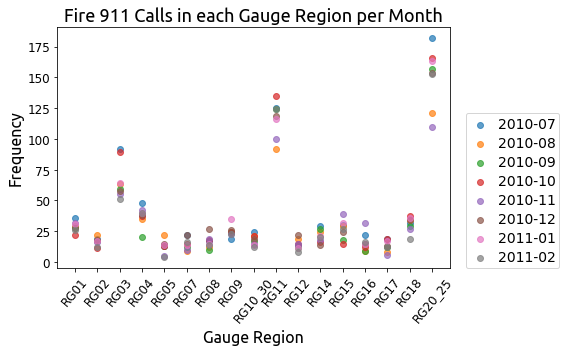

In [28]:
dates_f_date = ['2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02']

fig, ax = plt.subplots(figsize=(8,5))
for j in range(8):
    ax.plot( df_fire_10_11_F_trans['C_gauge'], df_fire_10_11_F_trans.iloc[:, [1+j]], 'o', label = dates_f_date[j], alpha = 0.7)


handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=(1.04,0))
plt.setp(ax.get_legend().get_texts(), fontsize='14')
    
ax.set_xlabel('Gauge Region', fontsize=16, fontname='Ubuntu')
ax.set_ylabel('Frequency', fontsize=16, fontname='Ubuntu')
ax.set_title('Fire 911 Calls in each Gauge Region per Month', fontsize=18, fontname='Ubuntu')
plt.xticks(rotation=50)
ax.tick_params(labelsize=12)
fig.tight_layout()
#fig.savefig("CallsGaugeMonth.pdf", bbox_inches='tight')

We again find that the gauge regions that we identified previously with abnormal numer of calls do display this behavior consistently through time.

## Off days

Let us add information on off days: holidays and weekends. This data might act as an indicator of human activity. We can produce all the weekends in the years 2010 and 2011 with the help of the following function:

In [29]:
def all_x_days(x_day,year):
    '''Provides all the weekdays = x_day (e.g. all mondays) in a specific year.'''
    weekday_dict = {'monday':0,'tuesday':1,'wednesday':2,'thursday':3,'friday':4,'saturday':5,'sunday':6}
    d = date(year, 1, 1)                    # January 1st
    d += timedelta(days = (weekday_dict[x_day] - d.weekday() + 7) % 7)
    while d.year == year:
        yield d
        d += timedelta(days = 7)        

In addition, we can easily find online the federal and state holidays in those years. See, for instance,

https://www.officeholidays.com/countries/usa/regional.php?list_year=2010&list_region=washington

https://www.officeholidays.com/countries/usa/regional.php?list_year=2011&list_region=washington

Here we put them in a list:

In [30]:
holidays_10_11 = ['2010-01-01',
'2010-01-18',
'2010-02-15',
'2010-05-31',
'2010-07-05',
'2010-08-06',
'2010-10-11',
'2010-11-11',
'2010-11-25',
'2010-11-26',
'2010-12-24',
'2010-12-31',
'2011-01-17',
'2011-02-21',
'2011-05-30',
'2011-07-04',
'2011-08-05',
'2011-10-10',
'2011-11-11',
'2011-11-24',
'2011-11-25',
'2011-12-26']                    

Now we can build a list of `Timestamp` objects with holidays and weekends together:

In [31]:
off_days = []

for d in all_x_days('saturday',2010):
    off_days.append(pd.Timestamp(d))
    
for d in all_x_days('sunday',2010):
    off_days.append(pd.Timestamp(d))
    
for d in all_x_days('saturday',2011):
    off_days.append(pd.Timestamp(d))
    
for d in all_x_days('sunday',2011):
    off_days.append(pd.Timestamp(d))
    
for d in holidays_10_11:
    off_days.append(pd.Timestamp(d))

And we may as well build a data frame with this information. We also reduce the `Timestamp` precision to day:

In [32]:
off_days_list = pd.DataFrame(
    {'off_days': off_days
    })

off_days_list.off_days = off_days_list.off_days.dt.to_period('d')

We can now build a data frame which contains not only the rain and fire data, but also a new column that indicates whether the call happened in an off day. First, we reduce the precision of the `Datetime` column to day as well:

In [33]:

df_fire_10_11_off = df_fire_10_11[df_fire_10_11['Type'].str.contains('Fire')]

df_fire_10_11_off.loc[:,'Datetime'] = df_fire_10_11_off.loc[:,'Datetime'].dt.to_period('d')

C:\Users\scvargas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
df_fire_10_11_off.head()

,Type,Datetime,Latitude,Longitude,C_gauge
8,Auto Fire Alarm,2010-12-07,47.608434,-122.338125,RG11
16,Car Fire,2010-12-05,47.655047,-122.381130,RG12
33,Auto Fire Alarm,2010-11-26,47.621113,-122.358044,RG11
35,Auto Fire Alarm,2010-11-25,47.607266,-122.332451,RG20_25
67,Automatic Fire Alarm False,2011-03-01,47.613611,-122.331944,RG11


Then, we compara this `Datetime` column with the `off_days_list dataframe`. This produces a new column, `Off_Day`, that shows whether the call happenened in an off day:

In [35]:
df_fire_10_11_off = df_fire_10_11_off.assign(Off_Day=df_fire_10_11_off.Datetime.isin(off_days_list.off_days).astype(int))

df_fire_10_11_off.head()

,Type,Datetime,Latitude,Longitude,C_gauge,Off_Day
8,Auto Fire Alarm,2010-12-07,47.608434,-122.338125,RG11,0
16,Car Fire,2010-12-05,47.655047,-122.381130,RG12,1
33,Auto Fire Alarm,2010-11-26,47.621113,-122.358044,RG11,1
35,Auto Fire Alarm,2010-11-25,47.607266,-122.332451,RG20_25,1
67,Automatic Fire Alarm False,2011-03-01,47.613611,-122.331944,RG11,0


# Statistics

## Rain and Fire

We may now explore the possibility of a correlation between rain patterns and number of 911 fire calls. Here we present several pieces of evidence against this hypothesis.

As we found in the EDA process, the gauge regions RG20_25 and RG05 display the opposite behaviors when it comes to number of fire 911 calls: the former has more than 12 times the number of calls than the latter. If rain was a dominant factor, we would expect a noticeable difference between the rain patterns for these 2 gauges in the dates of relevance. As we see in the following plots, this does not seem to be case:

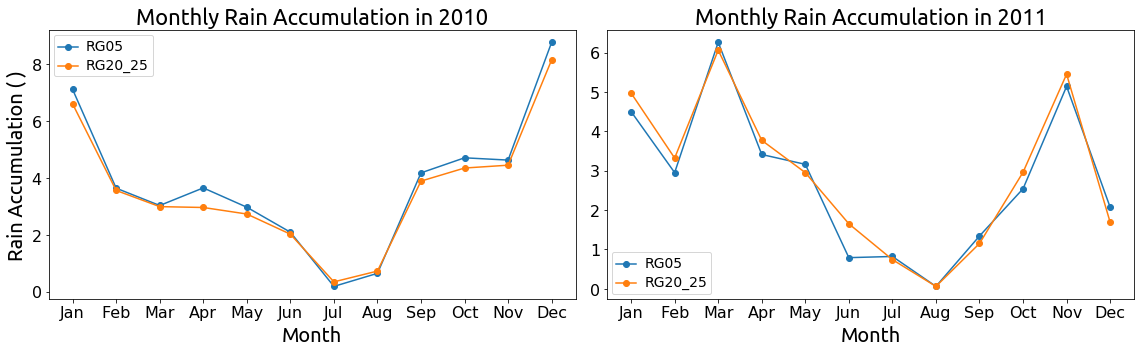

In [36]:

fig, ax = plt.subplots(ncols=2,figsize=(16,5))

ax[0].plot( ms, df[2 + 7*12 :14 + 12*7]['RG05'], 'o-', label='RG05')
ax[0].plot( ms, df[2 + 7*12 :14 + 12*7]['RG20_25'], 'o-', label='RG20_25')

handles, labels = ax[0].get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax[0].legend(handles, labels)
plt.setp(ax[0].get_legend().get_texts(), fontsize='14')

ax[0].set_xlabel('Month', fontsize=20, fontname='Ubuntu')
ax[0].set_ylabel('Rain Accumulation ( )', fontsize=20, fontname='Ubuntu')
ax[0].set_title('Monthly Rain Accumulation in 2010', fontsize=22, fontname='Ubuntu')
ax[0].tick_params(labelsize=16)


ax[1].plot( ms, df[2 + 8*12 :14 + 12*8]['RG05'], 'o-', label='RG05')
ax[1].plot( ms, df[2 + 8*12 :14 + 12*8]['RG20_25'], 'o-', label='RG20_25')

handles, labels = ax[1].get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax[1].legend(handles, labels)
plt.setp(ax[1].get_legend().get_texts(), fontsize='14')

ax[1].set_xlabel('Month', fontsize=20, fontname='Ubuntu')
#ax[1].set_ylabel('Rain Accumulation ( )', fontsize=20, fontname='Ubuntu')
ax[1].set_title('Monthly Rain Accumulation in 2011', fontsize=22, fontname='Ubuntu')
ax[1].tick_params(labelsize=16)

fig.tight_layout()
#fig.savefig("TwoPlots.pdf", bbox_inches='tight')

Certainly, we can find more compelling evidence. We have already organized our data in such a way that we can compare directly number of 911 fire calls and rain accumulation per gauge region per month. We must pair these data which lays in two distinct data frames.

In [37]:
points = []
for i in  g_ls.keys():
    points.extend(list(zip(df_rain_10_11_F[i],df_fire_10_11_F[i])))

rain_vals = [x[0] for x in points]
fire_vals = [x[1] for x in points]

Rain_and_Fire = pd.DataFrame(
    {'Rain_Acc': rain_vals,
     'Fire_Calls': fire_vals,
    })

Rain_and_Fire.head()

,Rain_Acc,Fire_Calls
0,0.17,36
1,0.82,29
2,3.49,28
3,3.57,22
4,4.64,32


Now we can make a scatter plot of these points:

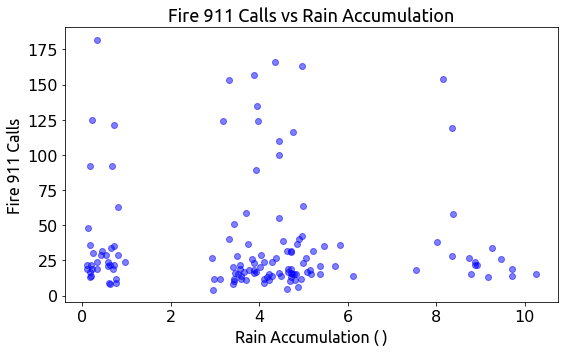

In [38]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(rain_vals, fire_vals, 'o', alpha = 0.5, c = 'b')
    
ax.set_xlabel('Rain Accumulation ( )', fontsize=16, fontname='Ubuntu')
ax.set_ylabel('Fire 911 Calls', fontsize=16, fontname='Ubuntu')
ax.set_title('Fire 911 Calls vs Rain Accumulation', fontsize=18, fontname='Ubuntu')
ax.tick_params(labelsize=16)
fig.tight_layout()
#fig.savefig("NoCor.pdf", bbox_inches='tight')

There is little indication of a clear correlation. There does seem to be a differentiation of rain accumulation in three distinct subgroups. The following python function corroborates our suspicions:

In [39]:
stats.linregress(rain_vals, fire_vals)

LinregressResult(slope=-0.5492766384107909, intercept=38.98392793888603, rvalue=-0.03588547545789807, pvalue=0.678314825246058, stderr=1.3214179714394578)

The correlation coefficient is -0.036, indicating that there is about 0.1% of probability of a linear correlation. Even more, the $p$-value indicates that there is a 67.8% in favor of a null hypothesis for absence of a correlation. This is well beyond any reasonable significance value. There is abundant evidence against the rain patters being relevant in determining the number of 911 fire calls.

We did found that the amount of rain accumulation per gauge seems to organize in 3 subgroups. We may be interested in finding the median for the number of 911 calls for each of these 3 subgroups:

In [40]:
print('Median for the number of calls for regions with REDUCED rain accumulations:',Rain_and_Fire['Fire_Calls'][Rain_and_Fire['Rain_Acc']<2].median())

print('Median for the number of calls for regions with MEDIUM rain accumulations:',Rain_and_Fire['Fire_Calls'][(Rain_and_Fire['Rain_Acc']>2) & (Rain_and_Fire['Rain_Acc']<7)].median())

print('Median for the number of calls for regions with LARGE rain accumulations:',Rain_and_Fire['Fire_Calls'][Rain_and_Fire['Rain_Acc']>7].median())

Median for the number of calls for regions with REDUCED rain accumulations: 24.0
Median for the number of calls for regions with MEDIUM rain accumulations: 19.0
Median for the number of calls for regions with LARGE rain accumulations: 24.0


As we see, even when slicing the data in these subsets, we can not find a particular behavior that correlates these two variables. 

## Time of the day and Fire

The previous exploration makes us think that instead of weather conditions, human activity might be the most relevant at exploring 911 fire calls. While we did not found significant difference between month to month data, in these data sets we might be able to see whether time of the day plays an important role in the number of 911 calls.

Let us first do a basic counting of 'day time' and 'night time' calls, by which we will simply mean calls between 6 am and 6 pm for day time and the rest for the night.

In [41]:
print('Total number of fire 911 calls in day time:')

df_fire_10_11['Type'][df_fire_10_11['Type'].str.contains('Fire') & (df_fire_10_11['Datetime'].dt.hour >= 6) & (df_fire_10_11['Datetime'].dt.hour < 18)].count()

Total number of fire 911 calls in day time:


3094

In [42]:
print('Total number of fire 911 calls in night time:')

df_fire_10_11['Type'][df_fire_10_11['Type'].str.contains('Fire') & ((df_fire_10_11['Datetime'].dt.hour >= 18) | (df_fire_10_11['Datetime'].dt.hour < 6))].count()

Total number of fire 911 calls in night time:


1971

There seems to be a significant abundance of calls in day time relative to the amount of calls in night time. Let us explore this more clearly by slicing the data hourly:

In [43]:
df_fire_10_11_N = df_fire_10_11[['Datetime']][df_fire_10_11['Type'].str.contains('Fire')]
times = pd.DatetimeIndex(df_fire_10_11_N.Datetime)
df_fire_hour = df_fire_10_11_N.groupby(times.hour).count().rename(columns={'Datetime': 'Calls'}).reset_index().rename(columns={'Datetime': 'Hour'})

df_fire_hour

,Hour,Calls
0,1,174
1,2,176
2,3,171
3,4,141
4,5,142
5,6,127
6,7,1711
7,8,92
8,9,106
9,10,100


There is clearly an abnormal number of calls in the range between 7 and 8 am. In addition, we found no calls made between 12 pm and 1 am. Due to the difference in orders of magnitude, we do not expect these to be taken as reliable points. For now, we will remove these hours out of our analysis. It is unclear if there is a justification for this odd behavior, which may be due, for instance, to the procedure by which calls are reported or stored at these particular times.

In [44]:
df_fire_hour_F = df_fire_hour[df_fire_hour.Hour != 7]

Let us compute the day time and night time calls with these corrections taken into account:

In [45]:
print('Total number of fire 911 calls in day time:')

df_fire_hour_F['Calls'][(df_fire_hour_F['Hour'] >= 6) & (df_fire_hour_F['Hour'] < 18)].sum()

Total number of fire 911 calls in day time:


1383

In [46]:
print('Total number of fire 911 calls in night time:')

df_fire_hour_F['Calls'][((df_fire_hour_F['Hour'] >= 18) | (df_fire_hour_F['Hour'] < 6))].sum()

Total number of fire 911 calls in night time:


1971

In [47]:
print('Percentage of 911 fire night calls: ',100*1971/(1383 + 1971))

Percentage of 911 fire night calls:  58.765652951699465


These numbers show that it is the night time that has more number 911 fire calls after all. But we should explore the possibility that this is an artifice of the data sample. To study this alternative, we can test this proportion against a null hypothesis of a 50% amount of night 911 fire calls. To do this we resort to a cumulative binomial distribution and compute the probability of obtaining the observed proportion or higher, assuming the null hypothesis. This $p$-value is

In [56]:
print(binom.sf(1971, 1383 + 1971, 0.5, 0))

1.027987490725739e-24


This is well below any reasonable level of significance, which suggests we should reject the null hypothesis. This indicates that there are certainly more 911 fire calls in the night. Let us plot the number of calls per hour to see this more clearly:

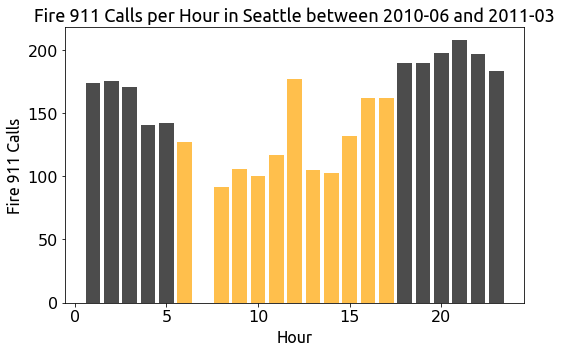

In [49]:
clist = ['orange' if ((i >= 6) and (i < 17)) else 'black' for i in range(1,23)]

fig, ax = plt.subplots(figsize=(8,5))

for j in range(22):
    ax.bar(df_fire_hour_F.iloc[j,0],df_fire_hour_F.iloc[j,1], alpha = 0.7, color = clist[j])

ax.set_xlabel('Hour', fontsize=16, fontname='Ubuntu')
ax.set_ylabel('Fire 911 Calls', fontsize=16, fontname='Ubuntu')
ax.set_title('Fire 911 Calls per Hour in Seattle between 2010-06 and 2011-03', fontsize=18, fontname='Ubuntu')
ax.tick_params(labelsize=16)
fig.tight_layout()
#fig.savefig("TimeOfTheDay.pdf", bbox_inches='tight')

## Off days and Fire

Let us explore the relation between off days and number of emergency calls. We can take a look of the raw number of 911 calls that happened in off days and in regular work days:

In [50]:
print('Fire 911 Calls in work days: ',df_fire_10_11_off[df_fire_10_11_off.Off_Day == 0].shape[0])
print('Fire 911 Calls in off days: ',df_fire_10_11_off[df_fire_10_11_off.Off_Day == 1].shape[0])

Fire 911 Calls in work days:  3439
Fire 911 Calls in off days:  1626


The fraction of calls in off days is extremely close to the fraction of off-days to total number of days in 2010 and 2011:

In [51]:
print('Percentage of 911 calls in off days: ',100*1626/(1626 + 3439))
print('Percentage of off days in 2010 and 2011: ',100*231/(2*365))

Percentage of 911 calls in off days:  32.10266535044423
Percentage of off days in 2010 and 2011:  31.643835616438356


It is then reasonable to explore the possibility that the calls in off days simply follow the same proportion that one observes for off days versus the totality of days in 2010 and 2011. We can use this as a null hypothesis for a one-sample proportion test.

We can cumpute a $p$-value taking as a null hypothesis that the proportion of calls in off-days matches the proportion of off-days in 2010 and 2011. To do this, we can use the cumulative binomial distribution and obtain the probability of obtaining the observed percentage of calls or higher assuming the null hypothesis. This $p$-value is

In [52]:
print(binom.sf(1626, 1626 + 3439, 231/(2*365), 0))

0.23634377239678397


This is well above any reasonable level of significance, which certainly does not allow us to reject the null hypothesis. This is an indicator that, if the calls are taken as a whole and not split into any categories, there seems to be no influence of the day being a work day or an off day in the number of 911 fire calls.

# Machine Learning Analysis

For this analysis, we will save the dataframe `df_fire_10_11_off` to a csv file of equal name, stored in the folder `processed_data`, which we shall study in the notebook `ML.ipynb`.

In [59]:
#df_fire_10_11_off.to_csv('df_fire_10_11_off.csv', encoding='utf-8', index=False)

# What is the EDA story?

We found no indication that rain accumulations and the number of fire 911 calls are correlated. Fire seems to be more directly related to human activity, as we found that about 53.5% of the fire emergencies happen in central Seattle. It would be interesting to try to find a correlation of 911 fire calls with population density, if the data were available. Most of fire emergency calls happen during night time, which seems to reinforce the relevance of human factors over weather. Nevertheless, there is a small peak of activity in the midday, which could match a peak of solar activity. In addition, the proportion of total 911 fire calls is not affected by the day being a work day or not.

Policies for awareness and prevention of fires are a good approach to the reduction of fire related emergencies. These can be focused in fires related to urban activity, specially in highly populated regions of the city, and for events that unfold typically during night time.